In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#Creating data points
n = 201
mean = [3,2]
cov =[[2,0.2], [0.2,2]]
mean_2 = [-2,-3]
cov_2 =[[3,0.3], [1,2]]

In [3]:
points = np.zeros([n, 3])

In [4]:
points[:n//2,2] = 1
points[n//2:,2] = -1

In [5]:
points[:n//2,0:2] = np.random.multivariate_normal(mean=mean, cov = cov, size=n//2)
points[n//2:,0:2] = np.random.multivariate_normal(mean=mean_2, cov = cov_2, size=(n//2+n%2))

D:\Miniconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: covariance is not positive-semidefinite.
  


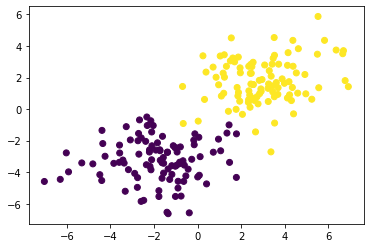

In [6]:
plt.scatter(points[:,0], points[:,1], c = points[:,2])

In [7]:
np.random.shuffle(points)

In [8]:
X = points[:,:2]
y = points[:,2]

In [9]:
#kernels
def linear_kernel(x1,x2):
    return np.dot(x1,x2)

def rbf_kernel(x1,x2,sigma=1):
    return np.exp(-np.square(np.linalg.norm(x1-x2))/(2*sigma))
    
def polynomial_kernel(x1,x2,p=2):
    return (1+np.dot(x1,x2))**p


In [10]:
def get_gram_matrix(X, kernel = linear_kernel):
    gram = np.zeros([X.shape[0],X.shape[0]])
    for i in range(X.shape[0]):
        for j in range(X.shape[0]):
            gram[i,j] = kernel(X[i],X[j])
    return gram

#T has to be large enough for alg. to converge, but finite in case it does not
def fit_kernel_perceptron(X, y, kernel = linear_kernel, T=10):
    gram = get_gram_matrix(X, kernel)
    alpha = np.zeros(gram.shape[0])
    for iter in range(T):
        for i in range(gram.shape[0]):
            if np.sign(np.sum(gram[:,i]*alpha*y)) != np.sign(y[i]):
                alpha[i] += 1
    s_vectors = X[alpha != 0]
    s_alpha = alpha[alpha != 0]
    s_labels = y[alpha != 0]
    #print(s_vectors)
    #print(s_alpha)
    #print(s_labels)
    return s_vectors, s_alpha, s_labels, kernel
                
def predict(X_test, s_vectors, s_alpha, s_labels, kernel):
    y_predicted = np.zeros(X_test.shape[0])
    for i in range(X_test.shape[0]):
        for j in range(s_vectors.shape[0]):
            y_predicted[i] += kernel(s_vectors[j],X_test[i])*s_alpha[j]*s_labels[j]
        y_predicted[i]=np.sign(y_predicted[i])
    return y_predicted

In [11]:
s_vectors, s_alpha, s_labels, kernel = fit_kernel_perceptron(X[:180,:],y[:180],polynomial_kernel,T=10)
y_test = predict(X[180:,:], s_vectors, s_alpha, s_labels, kernel)
print(y_test == y[180:])
print(s_vectors)
print(s_alpha)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True]
[[ 4.30885448  0.53948263]
 [-0.66862997 -3.27523567]
 [-3.27314189 -1.11453228]
 [ 0.71355387  2.66066468]
 [ 1.7863329  -1.57163505]
 [ 1.54931326  4.51033524]
 [-1.839857   -2.13897151]
 [-0.60658138 -3.55213766]
 [ 1.44705742 -1.00360715]
 [ 3.36980368 -2.71292645]
 [ 0.41366804 -4.74332347]
 [ 5.53168386  5.87004604]
 [-0.9561984  -3.55903726]
 [-3.59611883 -3.37643616]
 [-4.48539145 -4.15870617]
 [ 0.02995866 -0.7628779 ]
 [-6.0251366  -2.77661068]
 [ 1.96499812  2.29888517]
 [ 1.35013436 -1.5209068 ]
 [ 4.38595203  2.71501717]]
[ 1.  1.  1.  1.  9.  1.  1.  1.  8.  7.  1.  2.  1.  2.  1. 10.  2.  1.
  6.  1.]


In [12]:
s_vectors, s_alpha, s_labels, kernel = fit_kernel_perceptron(X[:180,:],y[:180],linear_kernel,T=10)
y_test = predict(X[180:,:], s_vectors, s_alpha, s_labels, kernel)
print(y_test == y[180:])
print(s_vectors)
print(s_alpha)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True]
[[ 4.30885448  0.53948263]
 [ 1.7863329  -1.57163505]
 [ 2.66230632 -1.44753993]
 [ 1.44705742 -1.00360715]
 [ 3.36980368 -2.71292645]
 [ 0.72389925 -2.73385301]
 [ 0.02995866 -0.7628779 ]
 [-0.68768607  1.43282309]
 [ 1.35013436 -1.5209068 ]]
[ 1.  6.  2.  6. 10.  2. 10.  5. 10.]


In [13]:
s_vectors, s_alpha, s_labels, kernel = fit_kernel_perceptron(X[:180,:],y[:180],rbf_kernel,T=10)
y_test = predict(X[180:,:], s_vectors, s_alpha, s_labels, kernel)
print(y_test == y[180:])
print(s_vectors)
print(s_alpha)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True]
[[ 4.30885448  0.53948263]
 [-0.66862997 -3.27523567]
 [-3.27314189 -1.11453228]
 [ 1.76975102 -0.01618396]
 [ 2.66230632 -1.44753993]
 [ 1.44705742 -1.00360715]
 [ 0.02995866 -0.7628779 ]
 [ 1.35013436 -1.5209068 ]]
[1. 1. 1. 1. 1. 1. 1. 1.]


In [14]:
#class-based
class Kernel_Classifier():
    def __init__(self, T=10, kernel=rbf_kernel):
        self.kernel = kernel
        self.T=T
    
    def get_gram_matrix(self, X):
        self.gram = np.zeros([X.shape[0],X.shape[0]])
        for i in range(X.shape[0]):
            for j in range(X.shape[0]):
                self.gram[i,j] = self.kernel(X[i],X[j])

    def fit(self, X, y):
        self.get_gram_matrix(X)
        self.alpha = np.zeros(self.gram.shape[0])
        for iter in range(self.T):
            for i in range(self.gram.shape[0]):
                if np.sign(np.sum(self.gram[:,i]*self.alpha*y)) != np.sign(y[i]):
                    self.alpha[i] += 1
        self.s_vectors = X[self.alpha != 0]
        self.s_alpha = self.alpha[self.alpha != 0]
        self.s_labels = y[self.alpha != 0]

    def predict(self, X_test):
        y_predicted = np.zeros(X_test.shape[0])
        for i in range(X_test.shape[0]):
            for j in range(self.s_vectors.shape[0]):
                y_predicted[i] += kernel(self.s_vectors[j],X_test[i])*self.s_alpha[j]*self.s_labels[j]
            y_predicted[i]=np.sign(y_predicted[i])
        return y_predicted

In [15]:
clf = Kernel_Classifier(T=10,kernel=polynomial_kernel)
clf.fit(X[:180,:],y[:180])
print(clf.s_vectors, clf.s_alpha, clf.s_labels)

[[ 4.30885448  0.53948263]
 [-0.66862997 -3.27523567]
 [-3.27314189 -1.11453228]
 [ 0.71355387  2.66066468]
 [ 1.7863329  -1.57163505]
 [ 1.54931326  4.51033524]
 [-1.839857   -2.13897151]
 [-0.60658138 -3.55213766]
 [ 1.44705742 -1.00360715]
 [ 3.36980368 -2.71292645]
 [ 0.41366804 -4.74332347]
 [ 5.53168386  5.87004604]
 [-0.9561984  -3.55903726]
 [-3.59611883 -3.37643616]
 [-4.48539145 -4.15870617]
 [ 0.02995866 -0.7628779 ]
 [-6.0251366  -2.77661068]
 [ 1.96499812  2.29888517]
 [ 1.35013436 -1.5209068 ]
 [ 4.38595203  2.71501717]] [ 1.  1.  1.  1.  9.  1.  1.  1.  8.  7.  1.  2.  1.  2.  1. 10.  2.  1.
  6.  1.] [ 1. -1. -1.  1. -1.  1. -1. -1. -1.  1. -1.  1. -1. -1. -1.  1. -1.  1.
 -1.  1.]


In [16]:
pred = clf.predict(X[180:,:])
pred

array([-1., -1.,  1.,  1.,  1., -1.,  1., -1., -1.,  1., -1., -1., -1.,
       -1., -1.,  1., -1.,  1.,  1.,  1., -1.])

No handles with labels found to put in legend.


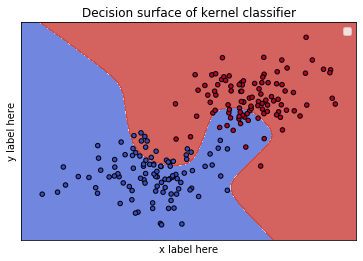

In [17]:
#https://stackoverflow.com/questions/51297423/plot-scikit-learn-sklearn-svm-decision-boundary-surface
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

'''# The classification SVC model
model = svm.SVC(kernel="linear")

fig, ax = plt.subplots()'''
clf = Kernel_Classifier(T=10,kernel=polynomial_kernel)
clf.fit(X,y)
fig, ax = plt.subplots()

# title for the plots
title = ('Decision surface of kernel classifier')

# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

No handles with labels found to put in legend.


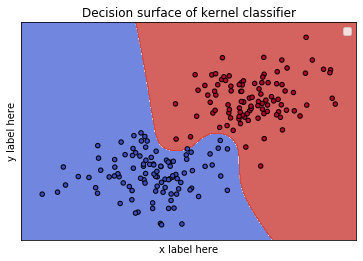

In [18]:
clf = Kernel_Classifier(T=10,kernel=rbf_kernel)
clf.fit(X,y)
fig, ax = plt.subplots()

# title for the plots
title = ('Decision surface of kernel classifier')

# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()